In [31]:
import pandas as pd
import numpy as np

In [32]:
df = pd.read_csv("/Users/uv/Downloads/results_rf.csv")
df.drop("Unnamed: 0", inplace=True, axis=1)
df.isna().sum()
df.head()

,file,prob_class_0,prob_class_1,prob_class_2,prob_class_3,prob_class_4,prob_class_5,prob_class_6
0,70-MFCC.csv,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,70-MFCC.csv,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,70-MFCC.csv,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,70-MFCC.csv,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,70-MFCC.csv,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [33]:
grouped = df.groupby('file').mean().reset_index()
grouped['file'] = (grouped['file'].str[:-9]).astype(int)
grouped.sort_values(by='file', axis=0, inplace=True)
grouped.tail()

,file,prob_class_0,prob_class_1,prob_class_2,prob_class_3,prob_class_4,prob_class_5,prob_class_6
23,112,0.009745,0.051365,0.141775,0.258533,0.124482,0.082248,0.331852
24,113,0.018446,0.037543,0.161544,0.280617,0.076189,0.145075,0.280586
25,114,0.083021,0.038090,0.140760,0.188654,0.042319,0.404335,0.102821
26,115,0.029514,0.245103,0.146784,0.233115,0.121571,0.067657,0.156256
27,116,0.006038,0.097137,0.555091,0.040293,0.171769,0.020743,0.108928


In [40]:
class_6 = grouped.nlargest(5, 'prob_class_0')
class_6

,file,prob_class_0,prob_class_1,prob_class_2,prob_class_3,prob_class_4,prob_class_5,prob_class_6
111,95,0.212582,0.039682,0.242635,0.193064,0.019154,0.184579,0.108305
103,87,0.154230,0.038660,0.204532,0.189293,0.056792,0.167418,0.189076
1,2,0.121685,0.071845,0.137391,0.163312,0.086544,0.182884,0.236339
77,61,0.117682,0.071504,0.232246,0.180609,0.033206,0.311637,0.053116
0,1,0.115493,0.147938,0.160475,0.153357,0.098132,0.234624,0.089982


Text(0, 0.5, 'Class Probabilities')

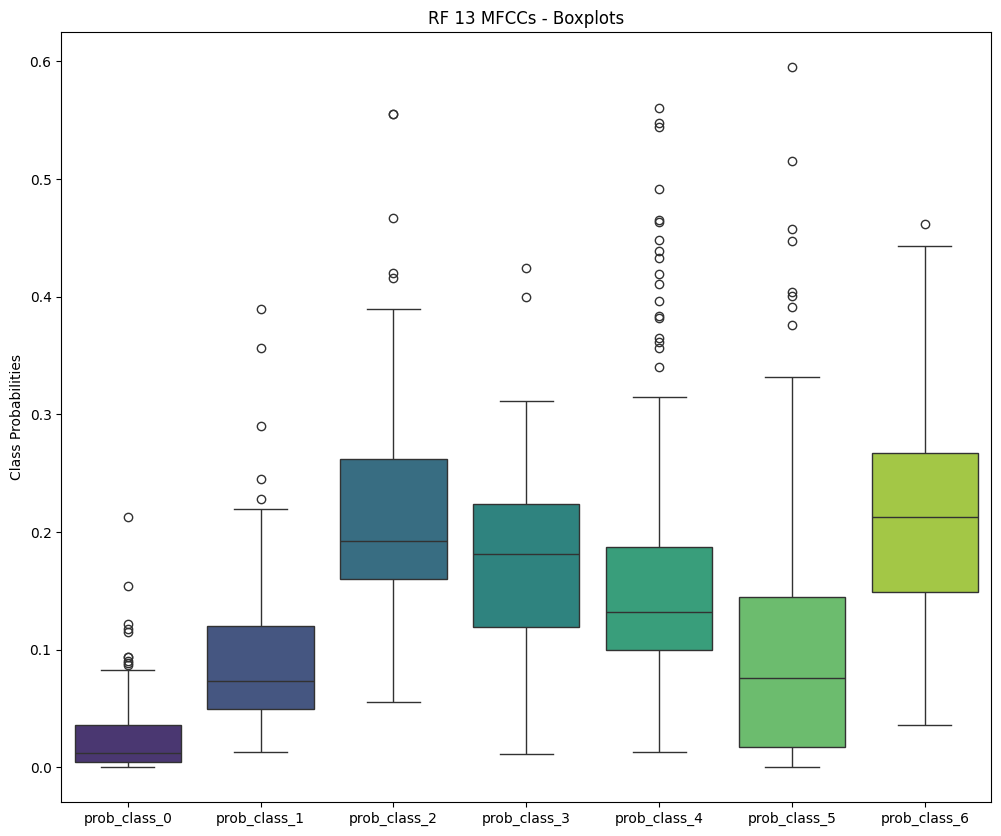

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))

sns.boxplot(data=grouped.drop('file', axis=1), palette='viridis')
plt.title("RF 13 MFCCs - Boxplots")
plt.ylabel("Class Probabilities")

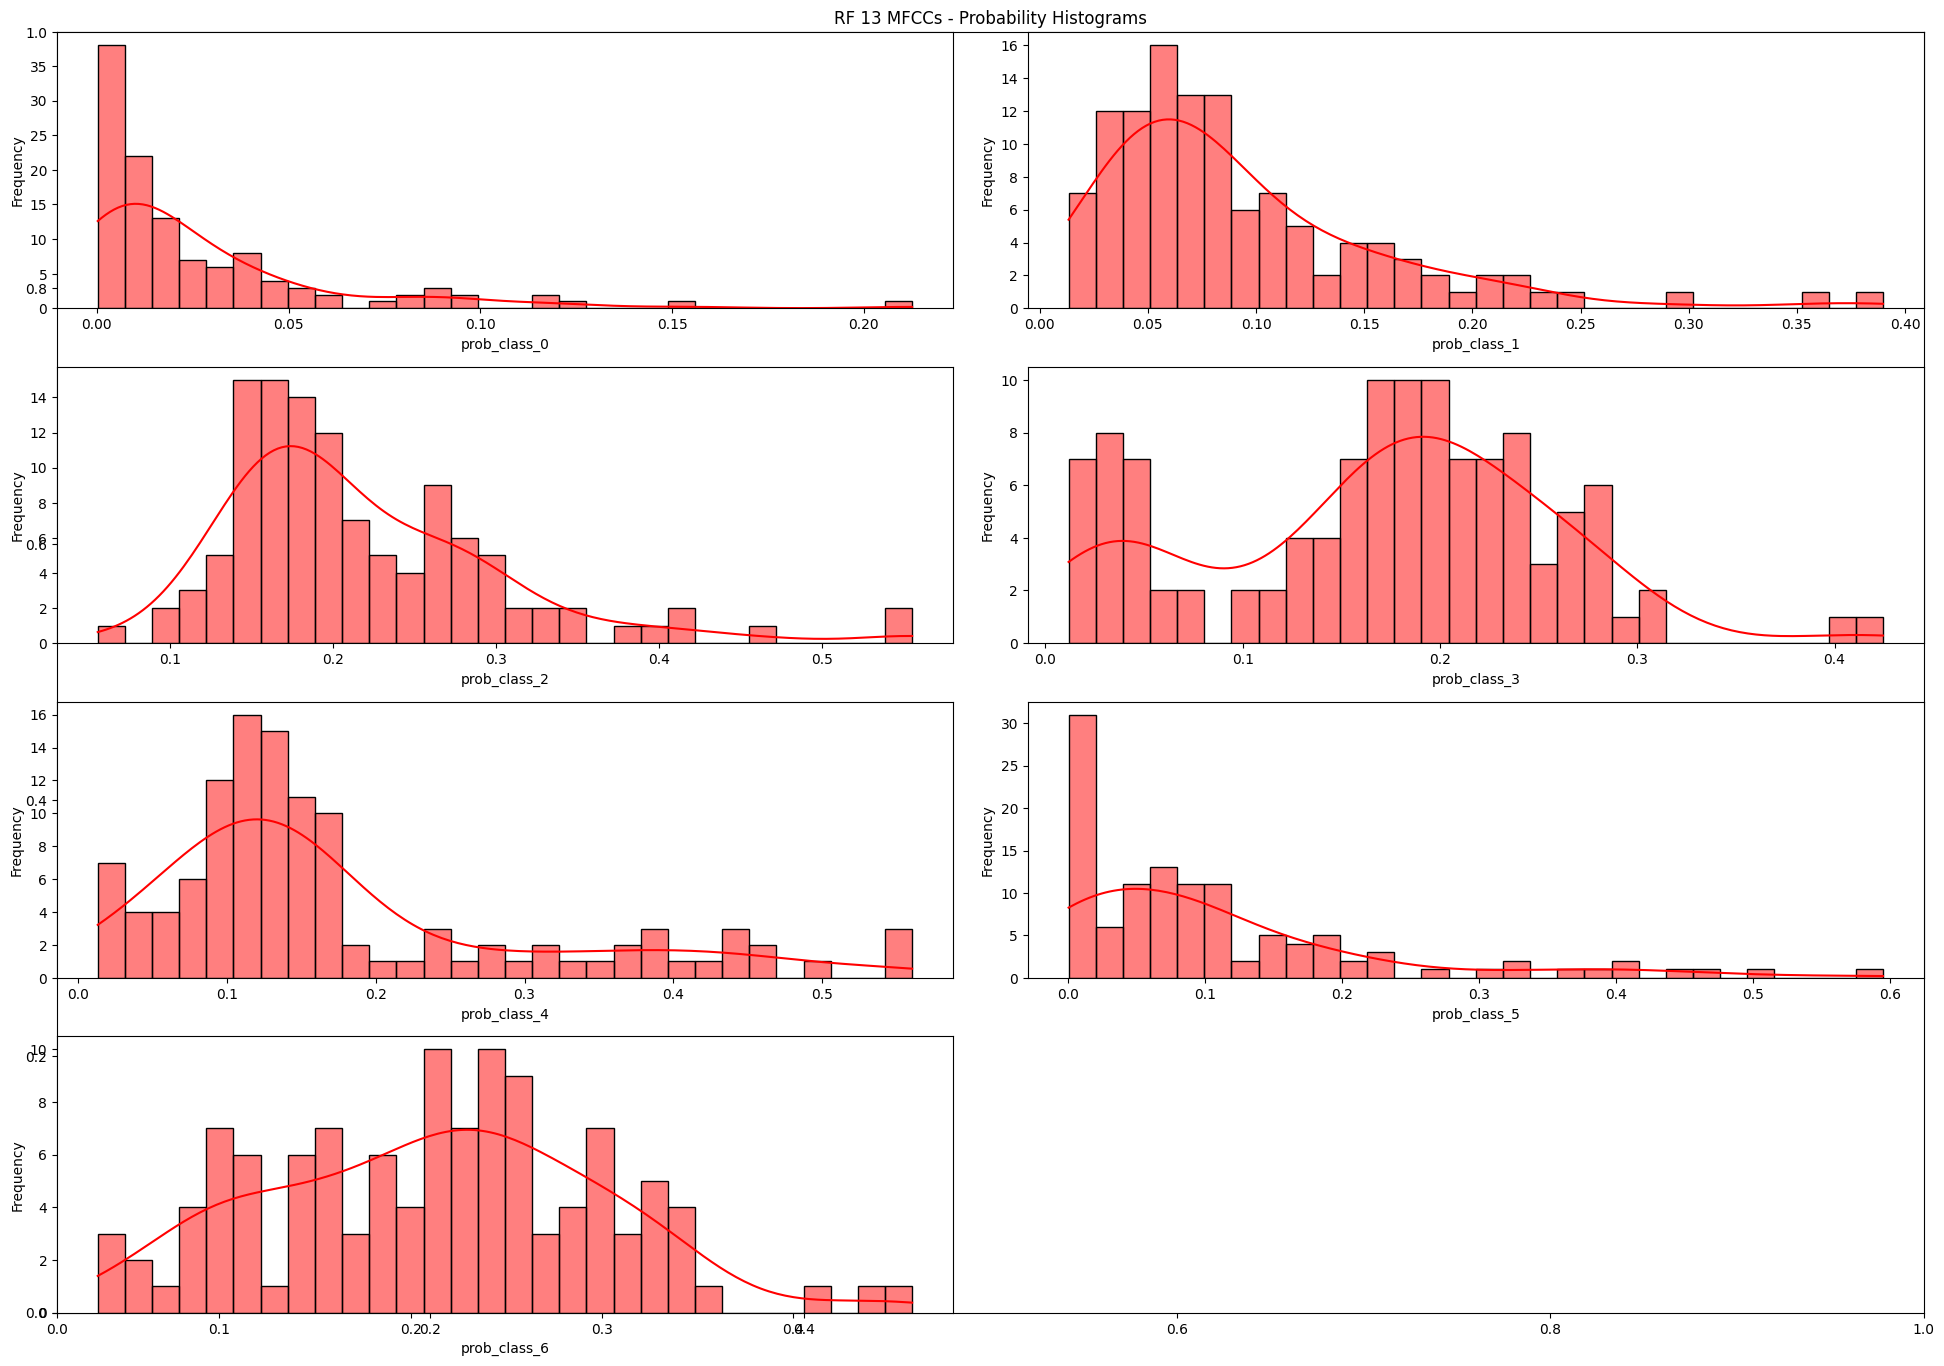

In [36]:
plt.figure(figsize=(20, 14))
plt.title("RF 13 MFCCs - Probability Histograms")

for i, col in enumerate(grouped.drop('file', axis=1).columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(grouped[col], bins=30, kde=True, color='red')
    plt.ylabel("Frequency")

plt.tight_layout()

In [37]:
final_results = grouped.copy()
columns = ['file', 0, 1, 2, 3, 4, 5, 6]
final_results.columns = columns
final_results.columns
final_results['Class'] = final_results[columns].drop('file', axis=1).idxmax(axis=1)
final_results['Prob'] = final_results[columns].drop('file', axis=1).max(axis=1)

In [41]:
final_results.head()

,file,0,1,2,3,4,5,6,Class,Prob
0,1,0.115493,0.147938,0.160475,0.153357,0.098132,0.234624,0.089982,5,0.234624
1,2,0.121685,0.071845,0.137391,0.163312,0.086544,0.182884,0.236339,6,0.236339
2,3,0.028578,0.038876,0.108205,0.175514,0.042191,0.515198,0.091439,5,0.515198
3,4,0.008801,0.029180,0.271380,0.182073,0.113144,0.098446,0.296976,6,0.296976
4,5,0.002366,0.113055,0.268380,0.040713,0.433168,0.002764,0.139553,4,0.433168


In [39]:
final_results.to_csv("final_results_rf.csv")

In [12]:
for class_num in range(7):
    

IndentationError: expected an indented block (1614383321.py, line 2)